In [42]:
import pandas as pd

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 读取带有标签的数据集
df = pd.read_csv(r"C:\Users\user\Desktop\Miki\5508\Project\labeled_df.csv")

# 定义特征和目标变量
X = df['Combined_Content']  # 特征：合并后的文本内容
y = df['label']             # 目标变量：标签

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# 对训练数据拟合并转换为TF-IDF特征
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# 对测试数据只进行转换
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 初始化逻辑回归模型
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

# 训练模型
logistic_model.fit(X_train_tfidf, y_train)

# 在测试集上进行预测
y_pred = logistic_model.predict(X_test_tfidf)

# 输出分类报告
print(classification_report(y_test, y_pred))

# 输出混淆矩阵
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.22      0.32       397
           1       0.72      0.94      0.81       849

    accuracy                           0.71      1246
   macro avg       0.67      0.58      0.57      1246
weighted avg       0.69      0.71      0.66      1246

[[ 86 311]
 [ 52 797]]


In [44]:
# 假设 df_test 是包含 X_test 和 y_test 的DataFrame
df_test = pd.DataFrame({'Content': X_test, 'True Label': y_test, 'Predicted Label': y_pred})

# 找出所有假正例（False Positives）
false_positives = df_test[(df_test['True Label'] == 0) & (df_test['Predicted Label'] == 1)]

# 找出所有假负例（False Negatives）
false_negatives = df_test[(df_test['True Label'] == 1) & (df_test['Predicted Label'] == 0)]

# 分别查看假正例和假负例
print("False Positives:", false_positives)
print("False Negatives:", false_negatives)


False Positives:                                                 Content  True Label  \
318   161112 2200上傳下載附件1031 KB161112 2200上傳下載附件19728...           0   
1228  本帖最後由 celavie 於 11813 2205 編輯請CLICK 入有好心人已將資料整...           0   
2228  早幾日收到的1291 2111上傳下載附件7849 KB 同佢玩下野 同佢傾下計啦 可能係想...           0   
1766  岩岩有個電話打哩中左獎中左bb學習套裝中左咩8號獎上荷花個網又唔見有哩樣野之後又約時間俾我又...           0   
1222  小心核實收據特別是減價貨品超市說減價但印出來的價單是舊價或者收銀機收的是舊價特別是廣告用斤店...           0   
...                                                 ...         ...   
637   呢間野激死我我個女係個度學畫畫學左一排我個女有日返黎同我講佢唔鍾意係個度學畫畫我問點解啦女女...           0   
1097  我唔係話我張單特別大我去麥當勞買左個辣雞腿包比左個麥香雞包我我知道辣雞腿包舊雞大一半我好聲好...           0   
3738  以前食開麥當奴 20件麥樂雞 BK要揸車去好遠所以咁多年都無食過 點知多手click 入去發...           0   
1978  22821 1714上傳下載附件104 MB22821 1714上傳下載附件90906 KB...           0   
1612              有得報警嗎141220 0954上傳下載附件47327 KB 唔洗理佢就得           0   

      Predicted Label  
318                 1  
1228                1  
2228                1  
1766                1  
1222      

In [45]:
pip install nltk

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# 确保nltk资源已下载
nltk.download('punkt')

# 定义一个函数来找出文本中最常见的N-grams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in sorted(vec.vocabulary_.items(), key=lambda x: x[1])]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:50]

# 示例：应用到你的数据中，确保你已经有了 false_positives 和 false_negatives DataFrame
print("Top unigrams in False Positives:", get_top_ngrams(false_positives['Content'], 1))
print("Top unigrams in False Negatives:", get_top_ngrams(false_negatives['Content'], 1))


Top unigrams in False Positives: [('發表於', 590), ('kb', 154), ('本帖最後由', 100), ('20222', 88), ('ckbb', 52), ('20221', 44), ('thanks', 39), ('email', 38), ('140909', 35), ('顯示更多', 27), ('120802', 26), ('100', 24), ('account', 24), ('22821', 23), ('回覆負評過多按此顯示原文', 23), ('27', 22), ('20', 21), ('編輯', 21), ('sharing', 20), ('28歲點會唱四大天王', 19), ('21817', 18), ('2198', 18), ('mraugust', 18), ('nan', 18), ('130613', 17), ('1845', 17), ('pm', 17), ('多謝提醒', 17), ('10', 16), ('23111', 16), ('pls', 16), ('sharonchung', 16), ('09228', 15), ('140320', 15), ('20730', 15), ('thx', 15), ('引用', 15), ('140425', 14), ('14320', 14), ('150122', 14), ('send', 14), ('120813', 13), ('18415', 13), ('1846', 13), ('2728', 13), ('la', 13), ('呀姨', 13), ('家常便飯1264', 13), ('12622', 12), ('160115', 12)]
Top unigrams in False Negatives: [('nan', 51), ('kb', 10), ('空頭支票呃名牌', 4), ('網上拍賣騙案猖獗', 4), ('110', 2), ('1105上傳下載附件61862', 2), ('1140上傳下載附件1152', 2), ('140706', 2), ('realmad我唔想講明邊間但又唔想佢再用', 2), ('來呃人我只可這樣天水圍', 2), ('個留言

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# 读取数据
df = pd.read_csv(r'C:\Users\user\Desktop\Miki\5508\Project\labeled_df.csv')

# 处理空值
df['Combined_Content'] = df['Combined_Content'].fillna('')

# 移除可能导致误分类的词汇
words_to_remove = ['發表於', '本帖最後由', '編輯', 'kb', 'thanks', 'email', '顯示更多', '回覆負評過多按此顯示原文']
for word in words_to_remove:
    df['Combined_Content'] = df['Combined_Content'].str.replace(word, '', regex=False)

# 定义特征和目标变量
X = df['Combined_Content']
y = df['label']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 过采样少数类
sm = SMOTE(random_state=42)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_res, y_train_res = sm.fit_resample(X_train_tfidf, y_train)

# 训练模型
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_res, y_train_res)

# 评估模型
X_test_tfidf = vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.47      0.42      0.44       397
           1       0.74      0.78      0.76       849

    accuracy                           0.67      1246
   macro avg       0.61      0.60      0.60      1246
weighted avg       0.66      0.67      0.66      1246



In [49]:
#看到了一些改进，尤其是在非诈骗内容（类别 0）的召回率方面，从0.22提高到了0.42。这意味着模型现在能够更好地识别出非诈骗的内容。
#同时，诈骗内容（类别 1）的精确度和召回率也保持在较高水平，虽然精确度有所下降，但召回率有所提升。虽然总体准确率略有下降，
#但宏观平均（macro avg）的精确度、召回率和F1分数都有所提高，这表明模型在两个类别之间的平衡方面有所改进。

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# 假设df是你的DataFrame，并且已经包含了'Combined_Content'和'label'列
X = df['Combined_Content']
y = df['label']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化TF-IDF向量化器并转换训练和测试数据
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 使用SMOTE进行过采样
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# 使用随机森林分类器
rf = RandomForestClassifier(random_state=42)

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [50, 100, 200],  # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
}

# 网格搜索对象
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)

# 在训练数据上运行网格搜索
grid_search.fit(X_train_res, y_train_res)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型在测试集上进行预测
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_tfidf)

# 评估模型
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': None, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.46      0.68      0.54       397
           1       0.80      0.62      0.70       849

    accuracy                           0.64      1246
   macro avg       0.63      0.65      0.62      1246
weighted avg       0.69      0.64      0.65      1246



Top 100 important features:
nan: 0.04768025248001265
kb: 0.024275779645682186
up: 0.007763411881147302
多謝提醒: 0.006467064029385735
push: 0.0060007110820091535
in: 0.005831557751427111
thx: 0.005245612114391971
pm: 0.005223451366814625
發表: 0.004960135726196841
for: 0.004889044759471016
謝謝提醒: 0.004856899761638935
報警: 0.004740416907158021
littlefunpig: 0.004376979824792321
我都收過: 0.004356055377757058
回覆: 0.004088740163082778
whatsapp: 0.004025743735054851
大力大力: 0.003995866270884702
chuiyeebird: 0.003844218386443639
咁都得: 0.0037833494293805247
發表回覆: 0.0037339974362522177
引用: 0.0036935765679535822
no: 0.0036447217214157653
call: 0.003491759787242009
shobi: 0.0034012749630815673
or: 0.0033993409096459916
百年x司海外菲傭: 0.003388530564831951
yahoo: 0.003384413556510572
mickeyeva: 0.0032682404979538747
mandy952: 0.003242998243595323
so: 0.0031928470337474844
thanks: 0.003192774004970468
香港01: 0.0031564602405511686
fb: 0.0029971906224939087
我都收到: 0.0029043736823613124
post: 0.0028604979473967214
bk: 0.0

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35613 (\N{CJK UNIFIED IDEOGRAPH-8B1D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37266 (\N{CJK UNIFIED IDEOGRAPH-9192}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30332 (\N{CJK UNIFIED IDEOGRAPH-767C}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

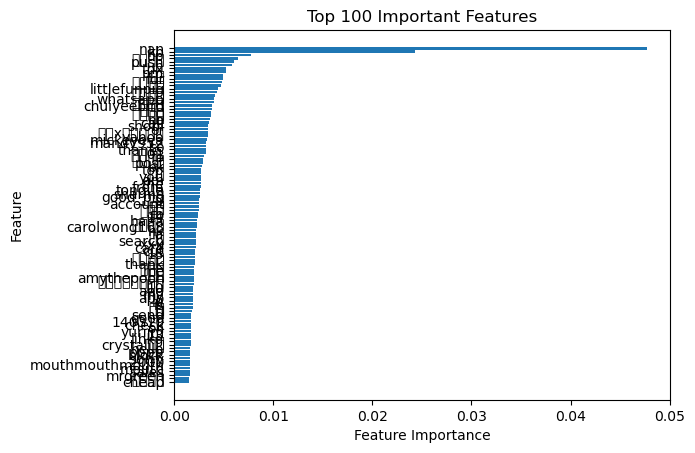

In [51]:
import matplotlib.pyplot as plt

# 获取特征重要性
feature_importances = best_rf.feature_importances_

# 将特征重要性与特征名字对应起来
feature_names = tfidf_vectorizer.get_feature_names_out()
features = sorted(zip(feature_importances, feature_names), reverse=True)

# 打印最重要的前100个特征
print("Top 100 important features:")
for importance, name in features[:100]:
    print(f"{name}: {importance}")

# 可视化最重要的前100个特征
top_features = features[:100]
plt.barh([name for importance, name in top_features], [importance for importance, name in top_features])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 100 Important Features")
plt.gca().invert_yaxis()  # 使得最重要的特征在图的顶部
plt.show()

In [52]:
import re

def clean_text(text):
    # 删除用户名
    text = re.sub(r'\b\w+媽咪\b|\b\w+大\b', '', text)
    # 删除论坛特定术语
    text = re.sub(r'\bpush\b|\bpm\b|\bup\b|\bthx\b|\bthanks\b|\bsharing\b', '', text)
    # 删除感谢的表达
    text = re.sub(r'\b多謝提醒\b|\b謝謝提醒\b|\b謝謝分享\b|\b幫推\b|\b謝謝\b', '', text)
    # 删除日期和时间
    text = re.sub(r'\b\d{6,}\b', '', text)
    # 删除其他无用信息
    text = re.sub(r'\bwhatsapp\b|\bfb\b|\big\b|\byahoo\b|\blihkg\b', '', text)
    # 删除一些常见的英文单词
    text = re.sub(r'\bthe\b|\bin\b|\band\b|\bor\b|\bfor\b|\bon\b|\bto\b|\byou\b|\bme\b|\bmy\b', '', text)
    # 删除过短的词汇
    text = re.sub(r'\b\w{1,2}\b', '', text)
    return text.strip()

# 应用数据清洗
df['Cleaned_Combined_Content'] = df['Combined_Content'].apply(clean_text)

In [53]:
X_clean = df['Cleaned_Combined_Content']

# 重新划分数据集
X_train_clean, X_test_clean, y_train, y_test = train_test_split(X_clean, y, test_size=0.3, random_state=42)

# 重新进行TF-IDF转换
X_train_tfidf_clean = tfidf_vectorizer.fit_transform(X_train_clean)
X_test_tfidf_clean = tfidf_vectorizer.transform(X_test_clean)

# 使用SMOTE进行过采样
X_train_res_clean, y_train_res = smote.fit_resample(X_train_tfidf_clean, y_train)

# 使用之前找到的最佳参数重新训练模型
best_rf.fit(X_train_res_clean, y_train_res)

# 重新评估模型
y_pred_clean = best_rf.predict(X_test_tfidf_clean)
print(classification_report(y_test, y_pred_clean))

              precision    recall  f1-score   support

           0       0.44      0.75      0.55       397
           1       0.82      0.56      0.66       849

    accuracy                           0.62      1246
   macro avg       0.63      0.65      0.61      1246
weighted avg       0.70      0.62      0.63      1246



In [54]:
# 假设 best_rf 是你训练好的模型，X_test_tfidf_clean 是清洗后的测试数据的 TF-IDF 表示
y_pred = best_rf.predict(X_test_tfidf_clean)

import numpy as np
from sklearn.metrics import precision_recall_curve

# 获取测试数据的预测概率
y_scores = best_rf.predict_proba(X_test_tfidf_clean)[:, 1]

# 计算所有可能阈值的精确度和召回率
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 选择一个阈值，这里我们举例选择一个阈值，实际操作中需要根据具体情况选择
threshold = 0.5  # 例如，选择 0.5 作为阈值
y_pred_adj = (y_scores >= threshold).astype(int)

false_negatives = X_test_clean[(y_test == 1) & (y_pred_adj == 0)]

# 查看一些假负例
print(false_negatives.sample(5))  # 随机查看5个假负例

4032    過去一周執法部門共接獲91宗網上投資騙案總損失逾4300萬港元當中接近一半案件均源自白撞Wh...
1829    頭先有位男仕打電話來無話找邊個又無講自己係邊個一出聲就話自己電話改左你知我係邊個嗎我我唔知喎...
561     今次終於到我媽又估下佢係邊個 又話去深圳飲酒好彩之前同媽單定聲 話佢知有呢類人專呃人唔係都好...
1583    電話詐騙停不了 好心男為救友被呃40萬人仔 東網專訊男子墮電騙陷阱失40萬人仔昨晚8時許一名...
3026    家中長老來電我收到電話通知你電話將2個鐘會停止所以拿拿淋打比我知問我發生左咩事好明顯騙案來啦...
Name: Cleaned_Combined_Content, dtype: object


In [55]:
# 假设 y_test 是你的真实标签，y_pred_adj 是你的模型预测
false_negatives = X_test_clean[(y_test == 1) & (y_pred_adj == 0)]

# 查看假负例
print(false_negatives)

1739    babybaby_pig  1774 0053 有冇啲電話騙案 係會知你同你家人個名打黎追數...
109     Cheishui  23919 1326 事源係carousell維修DYSON風筒點知比人...
881     去尖東某間譚仔食野入面好多大陸同胞食緊時有個拖喼中年肥男人無拉褲鏈去賣單個陣見佢係甘問收銀姐...
2104    騙人騙到欠薪可笑1677 2123上傳下載附件23758  又唔係既佢地都係打工 超級閒人 ...
599     有冇人有join你地知唔知係咩原來係保險你同佢買左電器有問題嘅話你搵代理整返如環境因素先賠當...
                              ...                        
921     花X銀行 citixxxk呃錢一向都係寄月結單找數我用左甘多年都好準時找數上個月無端端轉e ...
756     日本京都著名景點之一南禪寺近日在官方網站發出公告指6月時有可疑男子借意幫遊客拍照從中收取費用...
2484    滬江維多利亞家長智破騙局03月24日二 1234東網電視更多新聞短片滬江維多利亞學校小學部爆...
1450    FeiLong  2295 0146 馬尼拉當街綁架已經不是新聞以前一向都有但最近半年簡直達...
2154    小心請不要幫襯此人他是騙子收了錢不發貨不回覆警已報12854515227 0043上傳下載附...
Name: Cleaned_Combined_Content, Length: 377, dtype: object


In [56]:
from collections import Counter
import jieba

# 合并所有假负例文本
all_false_negatives_text = " ".join(false_negatives)

# 使用jieba进行中文分词
words = jieba.cut(all_false_negatives_text)

# 计数每个词的出现次数
word_counts = Counter(words)

# 输出最常见的200个词
print(word_counts.most_common(200))

[(' ', 22438), ('係', 4203), ('我', 3912), ('唔', 3348), ('佢', 2941), ('都', 2752), ('有', 2093), ('的', 1963), ('你', 1556), ('咁', 1430), ('個', 1416), ('人', 1412), ('話', 1299), ('就', 1244), ('好', 1199), ('到', 1016), ('又', 986), ('呢', 907), ('於', 895), ('去', 880), ('呃', 831), ('會', 824), ('要', 771), ('錢', 741), ('啦', 736), ('冇', 695), ('由', 694), ('但', 641), ('在', 619), ('地', 612), ('左', 610), ('得', 607), ('睇', 605), ('真', 572), ('無', 560), ('是', 536), ('呀', 534), ('可以', 531), ('咗', 528), ('買', 522), ('咩', 522), ('d', 520), ('比', 512), ('啲', 509), ('做', 508), ('原帖', 491), ('上', 490), ('後', 486), ('自己', 483), ('同', 478), ('嘅', 476), ('電話', 455), ('俾', 449), ('騙', 448), ('了', 445), ('既', 424), ('叫', 412), ('咪', 398), ('發表', 385), ('多', 379), ('用', 373), ('被', 370), ('為', 365), ('打', 353), ('公司', 342), ('月', 335), ('想', 330), ('香港', 322), ('再', 320), ('搵', 315), ('下', 314), ('如果', 311), ('住', 310), ('知', 306), ('收到', 302), ('來', 291), ('小心', 291), ('對', 285), ('大家', 281), ('D', 278), ('見', 278),

In [57]:
stop_words = set(['的', '是', '有', '我', '你', '他', '她', '我们', '你们', '他们', '她们', '在', '和', '及', '与', '也', '了', '呢', '啦', '咁', '係', '唔', '佢', '都', '個', '人', '話', '就', '好', '到', '又', '於', '去', '會', '要', '啲', '冇', '由', '但', '地', '左', '得', '睇', '真', '無', '呀', '可以', '咗', '買', '咩', 'd', '比', '做', '上', '後', '自己', '同', '嘅', '俾', '了', '既', '叫', '咪', '多', '用', '被', '為', '打', '公司', '月', '想', '香港', '再', '搵', '下', '如果', '住', '知', '收到', '來', '對', '大家', '見', '可能', '一', '時', '一個', '所以', '因為', '大', '嚟', '喎', '請', '以', '回覆', '說', '已', '傳下載', '走', '中', '日', '識', '之', '女', '幾', '帖子', '一定', '架', '聽', '囉', '3', '其實', '_', '之前', '或', '返', '賣', 'X', '好似', '問題', '男人', '攞', '和', '今日', '哋', '乜', '約', '野', '入', '收', '應該', '銀行', '事', '埋', '喺', '嘢', '嗰', '未', '最', '開', '而', '點', '可', '即', '原', '出', '萬', '與', '不過', '死', '女人', '仲', '隻', '1', '文章', 'check', '亦', '新', '其他', '吾', '4', '報警', '屋企', '啱', '電', 'post', '食', '5', '10', '向', '其', '黎', '要求', '晒'])

def clean_text(text):
    words = jieba.cut(text)
    cleaned_words = [word for word in words if word not in stop_words and len(word) > 1]
    return ' '.join(cleaned_words)

df['Updated_Cleaned_Content'] = df['Combined_Content'].apply(clean_text)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=3, max_df=0.9)
X_tfidf = tfidf_vectorizer.fit_transform(df['Updated_Cleaned_Content'])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# 确认y是包含标签信息的变量
# X_clean 是经过清理的文本内容

# 重新划分数据集
X_train_clean, X_test_clean, y_train, y_test = train_test_split(X_clean, y, test_size=0.3, random_state=42)

# 重新进行TF-IDF转换
tfidf_vectorizer = TfidfVectorizer()  # 可能需要根据之前的设置来调整参数
X_train_tfidf_clean = tfidf_vectorizer.fit_transform(X_train_clean)
X_test_tfidf_clean = tfidf_vectorizer.transform(X_test_clean)

# 使用SMOTE进行过采样（如果数据不平衡）
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res_clean, y_train_res = smote.fit_resample(X_train_tfidf_clean, y_train)

# 使用之前找到的最佳参数重新训练模型
best_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
best_rf.fit(X_train_res_clean, y_train_res)

# 重新评估模型
y_pred_clean = best_rf.predict(X_test_tfidf_clean)
print(classification_report(y_test, y_pred_clean))

              precision    recall  f1-score   support

           0       0.71      0.31      0.43       397
           1       0.74      0.94      0.83       849

    accuracy                           0.74      1246
   macro avg       0.73      0.62      0.63      1246
weighted avg       0.73      0.74      0.70      1246



In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 确保替换 'YourLabelColumnName' 为你的DataFrame中实际的标签列名称
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_tfidf[:1000], df['label'][:1000], test_size=0.3, random_state=42)

# 初始化随机森林模型，并设置 n_jobs=-1 使用所有可用的CPU核心
best_rf_small = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)

# 训练模型
best_rf_small.fit(X_train_small, y_train_small)

# 进行预测
y_pred_small = best_rf_small.predict(X_test_small)

# 打印分类报告
print(classification_report(y_test_small, y_pred_small))


              precision    recall  f1-score   support

           0       0.58      0.45      0.51       101
           1       0.75      0.84      0.79       199

    accuracy                           0.71       300
   macro avg       0.67      0.64      0.65       300
weighted avg       0.69      0.71      0.70       300



In [25]:
#1. 使用 TF-IDF、SMOTE 和最佳参数的模型
#准确率（accuracy）：74%
#对于非诈骗类（标签0）：精确率为71%，召回率为31%，F1分数为43%。
#对于诈骗类（标签1）：精确率为74%，召回率为94%，F1分数为83%。
#2. 使用所有CPU核心的随机森林模型
#准确率（accuracy）：71%
#对于非诈骗类（标签0）：精确率为58%，召回率为45%，F1分数为51%。
#对于诈骗类（标签1）：精确率为75%，召回率为84%，F1分数为79%。
#分析与建议
#第一个方法在整体准确率上略高于第二个方法，特别是在识别诈骗类别上的召回率非常高（94%），这意味着模型能够很好地识别出大多数的诈骗案例。然而，对于非诈骗类别的召回率相对较低（31%），表示有较多的非诈骗案例被错误地归类为诈骗。
#第二个方法在处理较小数据集时的表现较为平衡，尽管整体准确率略低，但非诈骗类别的召回率提高到了45%，这意味着模型在减少将非诈骗案例误判为诈骗的同时，仍然保持了对诈骗案例较高的识别能力。

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 设置你想要调整的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],  # 考虑100，200，300棵树
    'max_depth': [None, 10, 20, 30],  # 考虑不同的最大深度
    'min_samples_split': [2, 5, 10]  # 考虑最小样本分割
}

# 初始化随机森林模型
rf = RandomForestClassifier(random_state=42)

# 初始化网格搜索对象，cv=3表示3折交叉验证
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 在训练数据上运行网格搜索
grid_search.fit(X_train_res_clean, y_train_res)

# 输出最佳参数和最佳模型的得分
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf_clean)

# 打印分类报告
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.8445892455231352
              precision    recall  f1-score   support

           0       0.71      0.30      0.43       397
           1       0.74      0.94      0.83       849

    accuracy                           0.74      1246
   macro avg       0.73      0.62      0.63      1246
weighted avg       0.73      0.74      0.70      1246



In [64]:
best_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10, random_state=42)
best_rf.fit(X_train_res_clean, y_train_res)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [65]:
print(best_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [67]:
from joblib import dump

# Save the model to a file
dump(best_rf, 'best_random_forest_model.joblib')

['best_random_forest_model.joblib']

In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.externals import joblib

# 假设您的向量化器变量名为 tfidf_vectorizer
# 您需要将它替换成您实际使用的变量名
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\user\anaconda3\Lib\site-packages\sklearn\externals\__init__.py)